In [1]:
#program version 322

################ tunable parameters

r=3

bmin0=14; bmax0=18; smin0=12; smax0=20
bmin0=12; bmax0=14; smin0=12; smax0=18
bmin0=12; bmax0=14; smin0=12; smax0=19
# bmin0=12; bmax0=15; smin0=12; smax0=19
# bmin0=12; bmax0=16; smin0=12; smax0=18
#bmin0=14; bmax0=20; smin0=13; smax0=22
#bmin0=14; bmax0=20; smin0=12; smax0=21
#bmin0=15; bmax0=21; smin0=11; smax0=23
# bmin0=13; bmax0=18; smin0=13; smax0=23
# bmin0=14; bmax0=25; smin0=16; smax0=23
# bmin0=14; bmax0=24; smin0=16; smax0=24
bmin0=14; bmax0=15; smin0=14; smax0=23 #######################selftest 322
# bmin0=14; bmax0=17; smin0=14; smax0=23
# bmin0=14; bmax0=18; smin0=14; smax0=23
# bmin0=14; bmax0=19; smin0=14; smax0=23
# bmin0=14; bmax0=17; smin0=13; smax0=22

# to Martin: DON'T FORGET TO COMMENT OUT OLD ONES in this 
# bmin0 -= 1; bmax0 -= 1; smin0 -= 1; smax0 -= 1
# bmin0 -= 0; bmax0 -= 1; smin0 -= 0; smax0 -= 1
####bmin0 -= 0; bmax0 -= 0; smin0 -= 1; smax0 -= 0
# bmin0 -= 0; bmax0 -= 0; smin0 -= 1; smax0 -= 1

##ndbs=3#2#1
ndbmin=3; ndbmax=1; ndsmin=3; ndsmax=1
ndbmin=1; ndbmax=3; ndsmin=1; ndsmax=3
ndbmin=1; ndbmax=8; ndsmin=1; ndsmax=1 #######################selftest 322
# ndbmin=1; ndbmax=5; ndsmin=3; ndsmax=1
# ndbmin=1; ndbmax=1; ndsmin=3; ndsmax=3
# ndbmin=3; ndbmax=3; ndsmin=3; ndsmax=3


############################################## tunable parameters

output_file1='output-2.rules.csv'
output_file1='output-borderline1-2.rules.csv'
output_file1='output-ltl-r2-02.rules.csv'
output_file1='output/output-ltl-r3-0.rules.csv'
output_file1='output/output-ltl-r3-1.rules.csv'

#unit1=100#1250#600#1500#800#900#400#200#100#50#1000#256#128
##wt=1800##3000#2400#1800#1500#1200#900#700
w2=1600#800#200#500#400#200#100#50#1000#256#128#16#25
h2=30#w2#16
#maxtime=4*unit1 #*2
maxtime=w2#*2 #*4#*2
halftime=maxtime//2
##niter =wt#600#500#400#300#6##1000#500###800 # #1500
hthreshold=800#400:#200:#100:

step1=12 #4 #20 #8 #15 #5 #1 #37 #2
#step2=120#12#60 #120 #1

#######################


<IPython.core.display.Javascript object>


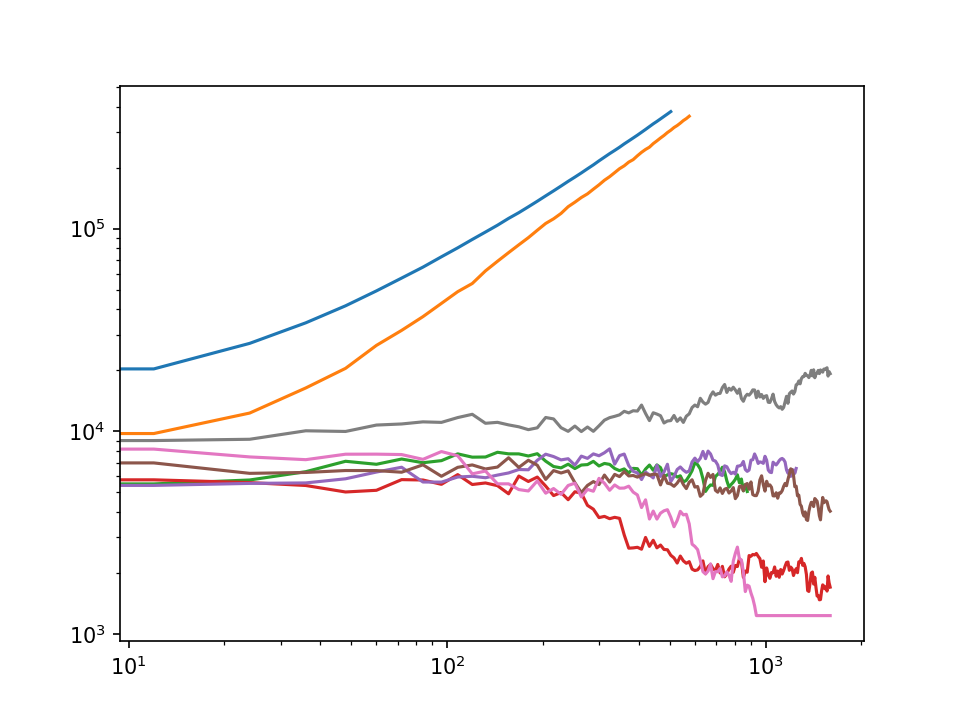

tag1 time_s time11 pop_s population ratio_s PPratio space_s w2 h2 w h rule_s rulespace rulestr x sumpop
soup time 876 pop 5047 ratio 0.7 space 1600 30 1561 805 rule lifelib r3b14t17s14t23 sumpop 5670588 
soup time 1596 pop 1702 ratio 0.8 space 1600 30 1576 276 rule lifelib r3b14t18s14t23 sumpop 4475760 
soup time 1248 pop 6557 ratio 0.9 space 1600 30 1817 802 rule lifelib r3b14t19s14t23 sumpop 8451324 
soup time 1596 pop 4036 ratio 0.8 space 1600 30 1581 708 rule lifelib r3b14t20s14t23 sumpop 8663880 
soup time 1596 pop 1232 ratio 0.5 space 1600 30 1507 190 rule lifelib r3b14t21s14t23 sumpop 4701336 
soup time 1596 pop 19249 ratio 1.2 space 1600 30 1953 377 rule lifelib r3b14t22s14t23 sumpop 23217408 
              total        used        free      shared  buff/cache   available
Mem:           4429        1592        1643          28        1193        2549
Swap:           759          23         735


In [2]:
from __future__ import print_function

%matplotlib notebook
##%matplotlib inline
from matplotlib import pyplot as plt

import math
import lifelib


###################

plt.figure()

##plt.yscale('log')
plt.loglog()

plt.ion()
##plt.ioff()

###################


#schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,x,sumpop'
print(schema1.replace(',',' '))

###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################

# in p1
# out p1, fPPratio
def test_rule():
    global p1, fPPratio
    
    ###pass

    pops = []
    gens = []
    hs=[]
    ws=[]
    ys=[]
    
    #####p1 = p1[niter]

    population_niter = None
    sumpopeverygen=0
    
    ##currgen = 0
    ##for _ in range(int(niter/step2)):
    for currgen in range(0,  maxtime, step1):
        
        ####
        
        p1=p1[step1]
        
        ####
        sumpopeverygen += p1.population * step1
        
        if sumpopeverygen> 100e6:#500e6:
            break ###
        
        ####
        
        if currgen//step1 == halftime//step1:
            population=p1.population ;  population_niter = population


        pops.append(p1.population)
        gens.append(currgen)
        
        bb=p1.bounding_box
        h=1
        w=1
        if bb:
            h=bb[2]-bb[0]
            w=bb[3]-bb[1]
        hs.append(h)
        ws.append(w)
        #ys.append(p1.population/h)
        ys.append(p1.population/(1+currgen))
        
        if h> hthreshold:#400:#200:#100:
            break ###
        
            
#     !free -m

    #######################################

    plt.plot(gens, pops)
    #plt.plot(gens, hs)
    ###plt.plot(gens, pops/hs)
#     plt.plot(gens, ys)
    plt.show()

    
    #######################################

    #print(tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)

    #######################################

    #####p1 = p1[niter]

    #######################################

    bb=p1.bounding_box
    #print(bb)

    h=1
    w=1
    if bb:
        h=bb[2]-bb[0]
        w=bb[3]-bb[1]


    tag1='soup'
    time_s='time'
    time11=currgen  ###  maxtime
    pop_s='pop'
    population=p1.population ;  population_2niter = population
    space_s='space'
    rule_s='rule'
    rulespace='lifelib'

    ratio_s='ratio'
    ######fPPratio= population_2niter/population_niter
    #######fPPratio= population_2niter/(population_niter+1)
    fPPratio= population_2niter/(pops[currgen//step1//2]+1)
    PPratio= '{:.1f}'.format(fPPratio)
    #log2PP= '{:.1f}'.format(math.log2(fPPratio) )

    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,rest1)
#     print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, 'sumpop' , sumpopeverygen,    rest1)
    if fPPratio<1.6 and h>70  :
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, 'sumpop' , sumpopeverygen,    rest1)
    with open(output_file1,'a') as f1:
        #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, file=f1)
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,  'sumpop' , sumpopeverygen,    rest1, file=f1)
   
    #####################################
    ##del p1
    ##del lt
    ##del sess
    #!free -m

#end def test_rule
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################


##with open(input_file1) as f0:
    ##input1=f0.read()
##sp0=input1.splitlines()
##for sp01 in sp0:
    ##if not sp01: continue ###

    ##sp5=sp01.split()
    ##i5=sp5.index('lifelib')
    ##rulestr=sp5[i5+1]
    ###print(rulestr)
    ###space1=' '
    ##rest1=space1.join(sp5[i5+2:])
    #print(rest1)
    

    
    
#for dbs in range(-ndbs,ndbs+1):
##for dbs in range(-1,2):
##for dbmax in range(ndbmax):

    #bmin=bmin0#+dbs
    #bmax=bmax0+dbs
    #smin=smin0#+dbs
    #smax=smax0#+dbs

for dbmin in range(ndbmin):

    bmin=bmin0+dbmin

    for dbmax in range(ndbmax):

        bmax=bmax0+dbmax

        for dsmin in range(ndsmin):

            smin=smin0+dsmin

            for dsmax in range(ndsmax):

                smax=smax0+dsmax

                ###########
                

                rulestr='r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)
                
                rest1=''

                #rulestr='b3s23'
                #rulestr='r2b7t12s7t10'  ## niter <2000 or too much memory ? RADEJI ZATIM NEDAVAT DO FORUM
                #rulestr='b{}s23'.format(bmax)
                ######rulestr='r1b3t{}s3t4'.format(bmax)
                ##rulestr='r2b7t12s7t10'.format(bmax)
    
    
                ###################

                ##sess = lifelib.load_rules(rulestr)

                try:
                    sess = lifelib.load_rules(rulestr)
                    #1/0
                except:
                    exc_info1=sys.exc_info()
                    #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
                    print("error:", exc_info1[0], exc_info1[1])
                    #raise
                    continue

                #####################
                    
                lt = sess.lifetree()

                p1=lt.pattern()
                p=0.3###08#02#05 #1#2#3#4#5 
                p1[0:h2, 0:w2] = p

                ################################
                test_rule()
                ################################
    
                
!free -m

if fPPratio < 1.5:
    p1.viewer()


In [6]:
p1.population
fPPratio

0.9484699769053118

In [1]:
!free -m
!top -b -n 1 | grep pyt

              total        used        free      shared  buff/cache   available
Mem:           4429        1353        1883          28        1193        2788
Swap:           759          23         735
 1858 martin    20   0  517168  81932  13788 S  0,0  1,8   2:31.63 jupyter-not+
 8875 martin    20   0  618900  43756  13436 S  0,0  1,0   0:00.74 python3
23139 martin    20   0 1091208 211336  27112 S  0,0  4,7   0:02.15 python3
23165 martin    20   0   52680  12892   7344 S  0,0  0,3   0:00.02 python3
23170 martin    20   0   52680  12868   7320 S  0,0  0,3   0:00.01 python3
23175 martin    20   0   52680  12868   7320 S  0,0  0,3   0:00.00 python3
23180 martin    20   0   52680  12888   7344 S  0,0  0,3   0:00.00 python3
23185 martin    20   0   52680  12892   7344 S  0,0  0,3   0:00.00 python3
25422 martin    20   0  624712  43548  13640 S  0,0  1,0   0:00.11 python3


In [35]:
#
import sys

try:
    sess = lifelib.load_rules('sffdsdfsfd')
    #1/0
except:
    exc_info1=sys.exc_info()
    #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
    print("error:", exc_info1[0], exc_info1[1])
    #raise

Generating code for rules ['sffdsdfsfd']...
error: <class 'ValueError'> Rule "sffdsdfsfd" does not belong to any genus


In [25]:
math.exp(0.7*math.log(2))

1.624504792712471